In [1]:
import ebooklib
from ebooklib import epub
def epub2thtml(epub_path):
    book = epub.read_epub(epub_path)
    chapters = []
    for item in book.get_items():
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            chapters.append(item.get_content())
    return chapters

In [2]:
from bs4 import BeautifulSoup

blacklist = [   '[document]',   'noscript', 'header',   'html', 'meta', 'head','input', 'script'   ]
# there may be more elements you don't want, such as "style", etc.

In [3]:
def chap2text(chap):
    output = ''
    soup = BeautifulSoup(chap, 'html.parser')
    text = soup.find_all(text=True)
    for t in text:
        if t.parent.name not in blacklist:
            output += '{} '.format(t)
    return output

In [4]:
def thtml2ttext(thtml):
    Output = ''
    for html in thtml:
        text =  chap2text(html)
        Output = text
    return Output

In [5]:
def epub2text(epub_path):
    chapters = epub2thtml(epub_path)
    ttext = thtml2ttext(chapters)
    return ttext

In [6]:
out=epub2text('simyaci.epub')

In [7]:
out


'Dipnotlar \n [1]  Kutsal Kitap, Yeni Yaşam Yayınları, 2010, s. 1100. \n [2]  İsa\'nın Tanrı sevgisinin simgesi. (ç.n.) \n [3]  "Esenlik" anlamına gelen ve Kutsal Kitap\'ta adı geçen bir kent. (ç.n.) \n [4]  Kutsal Kitap\'ta adından hem kral hem de rahip olarak söz edilen mitolojik kişi. Hz. İbrahim\'in, Kedorlaomer komutasındaki birleşik Mezopotamya ordularını yenerek, kaçırılan yeğeni Lût\'u kurtarmasının anlatıldığı ayette, gerçek bir kişi olarak geçer. (ç.n.) \n [5]  Din büyüklerinin ya da tarihe geçmiş ünlü kişilerin yaşamlarını ve olağanüstü davranışlarını anlatan öykü. "Yazgı"ya gönderme yapılıyor. (ç.n.) \n [6]  Metinde geçen "göğüslük" Kutsal Kitap\'taki göğüslüğe gönderme yapmaktadır. "Usta işi bir karar göğüslüğü yap. Onu da efod gibi, altın sırmayla, lacivert, mor, kırmızı iplikle, özenle dokunmuş ince kedenden yap. Dört köşe, eni ve boyu birer karış olacak; ikiye katlanacak. Üzerine dört sıra taş yuvası kak. Birinci sırada yakut, topaz, zümrüt; ikinci sırada firuze, lacive

In [8]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [52]:
#tırnak, üst tırnak, html kodları, özel tanımlar v.b.
silinecek_isaretler = [".", ",", "!","'",":","\"","\n",'"',")","(",";","?","çn"," s "]
cift_bosluk = ["  "]

silinecek_isaretler_sayisi=0
for i in range(len(out)):
    for j in range(len(silinecek_isaretler)):
        if out[i] == silinecek_isaretler[j]:
            silinecek_isaretler_sayisi += 1
            
for i in range(len(silinecek_isaretler)):
    out = out.replace(silinecek_isaretler[i],"")

for g in range(len(cift_bosluk)):
    out = out.replace(cift_bosluk[g]," ")

sayi=0
for h in range(len(out)):
    sayi+=1
    out = out.replace("[{}]".format(sayi),"")
print(out)


Dipnotlar Kutsal Kitap Yeni Yaşam Yayınları 20101100 İsanın Tanrı sevgisinin simgesi Esenlik anlamına gelen ve Kutsal Kitapta adı geçen bir kent Kutsal Kitapta adından hem kral hem de rahip olarak söz edilen mitolojik kişi Hz İbrahimin Kedorlaomer komutasındaki birleşik Mezopotamya ordularını yenerek kaçırılan yeğeni Lûtu kurtarmasının anlatıldığı ayette gerçek bir kişi olarak geçer Din büyüklerinin ya da tarihe geçmiş ünlü kişilerin yaşamlarını ve olağanüstü davranışlarını anlatan öykü Yazgıya gönderme yapılıyor Metinde geçen göğüslük Kutsal Kitaptaki göğüslüğe gönderme yapmaktadır Usta işi bir karar göğüslüğü yap Onu da efod gibi altın sırmayla lacivert mor kırmızı iplikle özenle dokunmuş ince kedenden yap Dört köşe eni ve boyu birer karış olacak ikiye katlanacak Üzerine dört sıra taş yuvası kak Birinci sırada yakut topaz zümrüt ikinci sırada firuze lacivert taşı aytaşı üçüncü sırada gökyakut agat ametist dördüncü sırada sarı yakut oniks ve yeşim olacakTaşlar altın yuvalara kakılacak

In [53]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
sentence=out
words = word_tokenize(sentence)

outStr = ""
 
for w in words:
    if w not in stopWords:
        outStr += w + " "
 
print(outStr)

Dipnotlar Kutsal Kitap Yeni Yaşam Yayınları 20101100 İsanın Tanrı sevgisinin simgesi Esenlik anlamına gelen Kutsal Kitapta adı geçen bir kent Kutsal Kitapta adından kral rahip olarak söz edilen mitolojik kişi Hz İbrahimin Kedorlaomer komutasındaki birleşik Mezopotamya ordularını yenerek kaçırılan yeğeni Lûtu kurtarmasının anlatıldığı ayette gerçek bir kişi olarak geçer Din büyüklerinin tarihe geçmiş ünlü kişilerin yaşamlarını olağanüstü davranışlarını anlatan öykü Yazgıya gönderme yapılıyor Metinde geçen göğüslük Kutsal Kitaptaki göğüslüğe gönderme yapmaktadır Usta işi bir karar göğüslüğü yap Onu efod altın sırmayla lacivert mor kırmızı iplikle özenle dokunmuş ince kedenden yap Dört köşe eni boyu birer karış olacak ikiye katlanacak Üzerine dört sıra taş yuvası kak Birinci sırada yakut topaz zümrüt ikinci sırada firuze lacivert taşı aytaşı üçüncü sırada gökyakut agat ametist dördüncü sırada sarı yakut oniks yeşim olacakTaşlar altın yuvalara kakılacak On iki taş olacak Üzerlerine mühür o

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/melihsafacelik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melihsafacelik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
text_file = open("asama1.txt", "w")
n = text_file.write(outStr)
text_file.close()

In [55]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

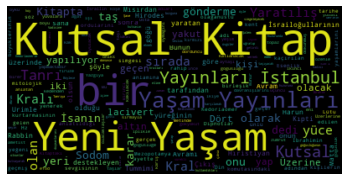

In [56]:
wordcloud = WordCloud().generate(outStr)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
piramit = np.array(Image.open("piramit.png"))
piramit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
piramit = piramit.reshape((piramit.shape[0],-1), order='F')

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transformed_piramit = np.ndarray((piramit.shape[0],piramit.shape[1]), np.int32)

for i in range(len(piramit)):
    transformed_piramit[i] = list(map(transform_format, piramit[i]))

In [59]:
piramit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

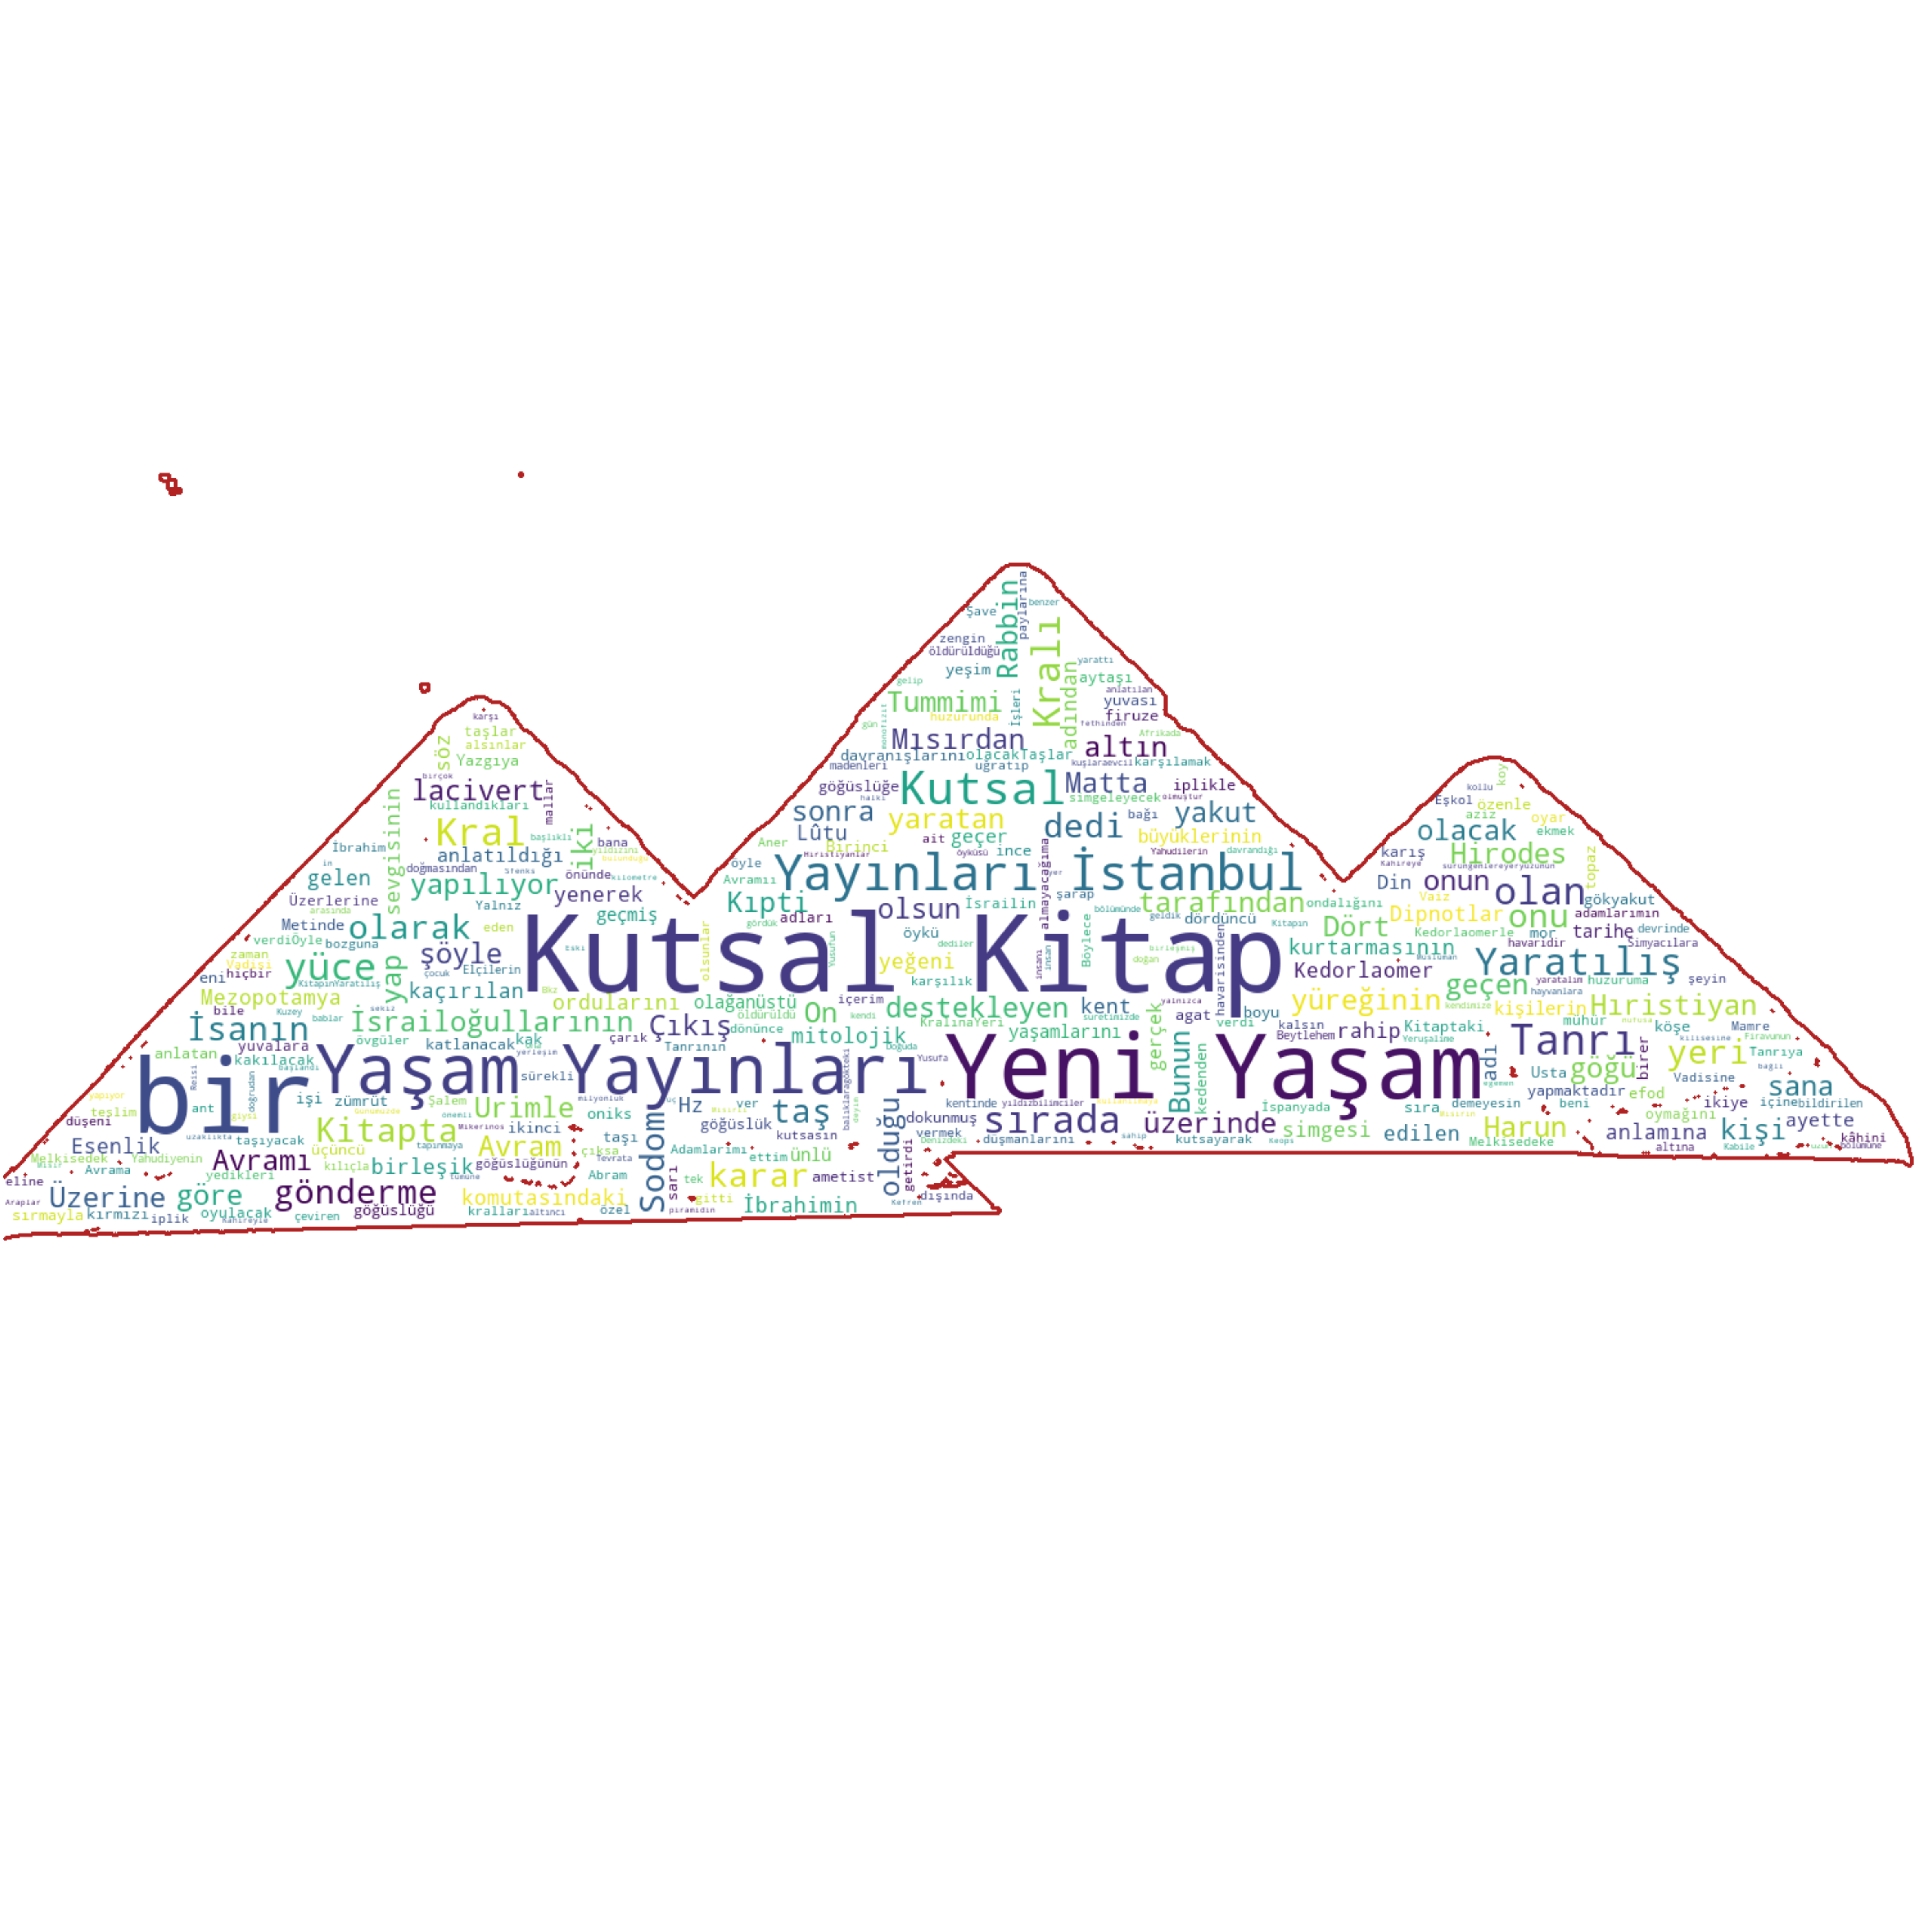

In [60]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_piramit,
               stopwords=stopWords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(outStr)

# store to file
wc.to_file("yeniPiramit.png")

# show
plt.figure(figsize=(86.9565,86.9565))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()